In [23]:
#Imports the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import customtkinter
from tkinter.ttk import Combobox



In [24]:

window=tk.Tk()
window.title("C T C")
window.geometry("800x600")
#customtkinter.set_appearance_mode("Dark")
window.configure(bg='#141316')

frame_1 = customtkinter.CTkFrame(master=window,
                               width=700,
                               height=500,
                               corner_radius=10,fg_color=("#1d1d20"))
frame_1.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

def select_file():

    global df
    path_file = tk.filedialog.askopenfilename()
    df = pd.read_csv(path_file)
    return df

label=tk.Label(master=window,text="Cyberbullying Tweets Classification",fg="white",bg="#1d1d20",font="Times 22 bold")

label.pack()
label.place(x=165,y=100)

#b1=tk.Button(text="Select File",font="Arial 14 bold",bg="black",fg="white",command=select_file)
b1=customtkinter.CTkButton(master=frame_1, text="Select File", command=select_file,fg_color=("dodgerblue", "darkslateblue"),text_color="white",width=120,height=50,border_width=3,corner_radius=9)
b1.place(relx=0.17, rely=0.7, anchor=tk.CENTER)

variable_1 = tk.StringVar()
variable_1.set("Features Model Select")
values_1 = ["TF-IDF", "Bag of Words"]
combobox_1 = Combobox(
    master=frame_1,
    textvariable=variable_1,
    values=values_1,
    font="Times 15 bold"
)
combobox_1.pack()
combobox_1.place(x=65,y=140)

variable_2 = tk.StringVar()
variable_2.set("Machine Model Select")
values_2 = ["KNeighborsClassifier","GaussianNB","MultinomialNB","DecisionTreeClassifier","SVM"]
combobox_2 = Combobox(
    master=frame_1,
    textvariable=variable_2,
    values=values_2,
    font="Times 15 bold"
    
)
combobox_2.pack()
combobox_2.place(x=65,y=220)

def change():
    
    global vFeatures
    global vMachines
    vFeatures=combobox_1.get()
    print(vFeatures)
    vMachines= combobox_2.get()
    print(vMachines)
    return vFeatures,vMachines

#b2=tk.Button(text="Run",font="Arial 14 bold",bg="black",fg="white",command=change)

b2=customtkinter.CTkButton(master=frame_1, text="Start", command=change,fg_color=("Red", "darkslateblue"),text_color="white",width=120,height=50,border_width=3,corner_radius=9)
b2.place(relx=0.4, rely=0.7, anchor=tk.CENTER)

combobox_1.bind("<<ComboboxSelected>>", lambda event: change())

window.mainloop()


TF-IDF
Machine Model Select
TF-IDF
SVM


In [25]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

check_df(df)

##################### Shape #####################
(47692, 2)
##################### Types #####################
tweet_text            object
cyberbullying_type    object
dtype: object
##################### Head #####################
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
##################### Tail #####################
                                              tweet_text cyberbullying_type
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...   

In [26]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

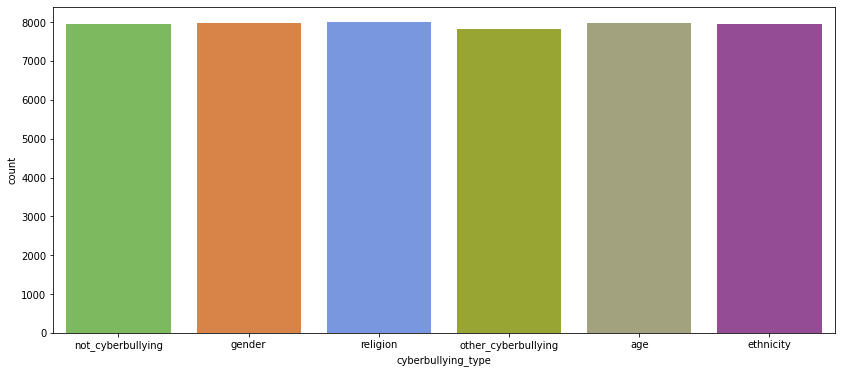

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colors_palet = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
]
                   
plt.figure(figsize=(14,6))
sns.countplot(x='cyberbullying_type', data=df, palette=colors_palet)
plt.show()

In [28]:
def label_encoder(dataframe, binary_col):
    
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

df=label_encoder(df,"cyberbullying_type")
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",3
1,Why is #aussietv so white? #MKR #theblock #ImA...,3
2,@XochitlSuckkks a classy whore? Or more red ve...,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3
4,@RudhoeEnglish This is an ISIS account pretend...,3
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1
47688,Turner did not withhold his disappointment. Tu...,1
47689,I swear to God. This dumb nigger bitch. I have...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1


In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df['tweet_text'] = df['tweet_text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reyhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
def features_model(vFeatures):
    
    print(vFeatures)
    if vFeatures == "TF-IDF":
        tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
        X=tfidf_v.fit_transform(df['tweet_text']).toarray()
        y=df['cyberbullying_type']
        
    else:
        cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
        X = cv.fit_transform(df['tweet_text']).toarray()#df['tweet_text']
        y = df.iloc[:, -1].values
    return X,y
    
X,y=features_model(vFeatures)

TF-IDF


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

SVM
[0.838138169619457, 0.836177696669449, 0.8378405071275044]


c:\Users\reyhan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


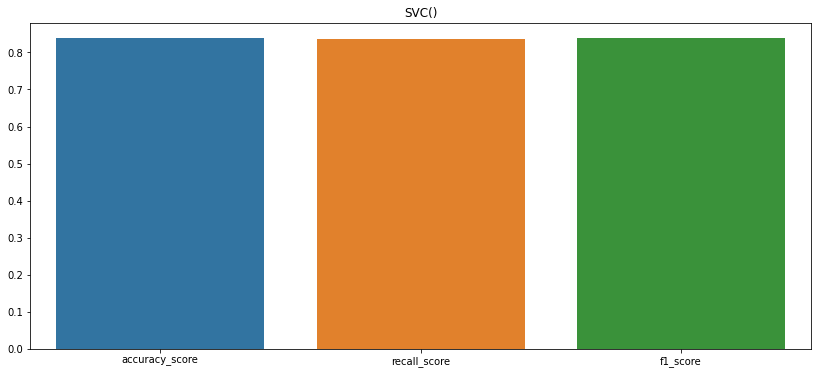

In [32]:
def score(classifier):

    classifier.fit(X_train, y_train)
    y1_pred = classifier.predict(X_test)
    accuracy= accuracy_score(y_test, y1_pred)
    recall=recall_score(y_test, y1_pred,average='macro')
    f1=f1_score(y_test, y1_pred,average='macro')

    x=["accuracy_score","recall_score","f1_score"]
    y=[accuracy,recall,f1]
    print(y)

    plt.figure(figsize=(14,6))
    sns.barplot(x,y).set_title(classifier)
    plt.show()

def Machine_Model(vMachines):

    print(vMachines)
    if vMachines=="KNeighborsClassifier":
        classifier = KNeighborsClassifier()
        score(classifier)
    elif vMachines=="GaussianNB":
        classifier = GaussianNB()
        score(classifier)
    elif vMachines=="MultinomialNB":
        classifier = GaussianNB()
        score(classifier)
    elif vMachines=="DecisionTreeClassifier":
        classifier =DecisionTreeClassifier()
        score(classifier)
        
    else:
        classifier =SVC()
        score(classifier)
        
Machine_Model(vMachines)

In [33]:
#KNeighborsClassifier
#[0.3626166264807632, 0.3672663148425633, 0.38216346964095976]
#[0.7019603732047385, 0.7012603063598157, 0.7215999474888507]

#GaussianNB
#[0.7070971799979033, 0.7070580824799498, 0.705897583708528]
#[0.7386518502987734, 0.7387514298867365, 0.7275235090592211]

#MultinomialNB
#[0.7070971799979033, 0.7070580824799498, 0.705897583708528]
#[0.7386518502987734, 0.7387514298867365, 0.7275235090592211]

#DecisionTreeClassifier
#[0.7944228954817066, 0.7909117510408267, 0.7930703080081313]
#[0.7927455708145508, 0.7891992700845226, 0.7913842496814243]

#SVM
#[0.838138169619457, 0.836177696669449, 0.8378405071275044]
#[0.8405493238284936, 0.8393590200472546, 0.8385352939266003]






